In [271]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Download latest version
print("Downloading dataset...")
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")
print("Path to dataset files:", path)


Path to dataset files: /Users/manojm/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [272]:
# Load the dataset
print("\nLoading books dataset...")
books = pd.read_csv(f"{path}/books.csv")
print(f"Original dataset shape: {books.shape}")


Loading books dataset...
Original dataset shape: (6810, 12)


In [273]:
# Display initial data info
print("\nFirst few rows of the dataset:")
print(books.head())


First few rows of the dataset:
          isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?i


Missing values heatmap...


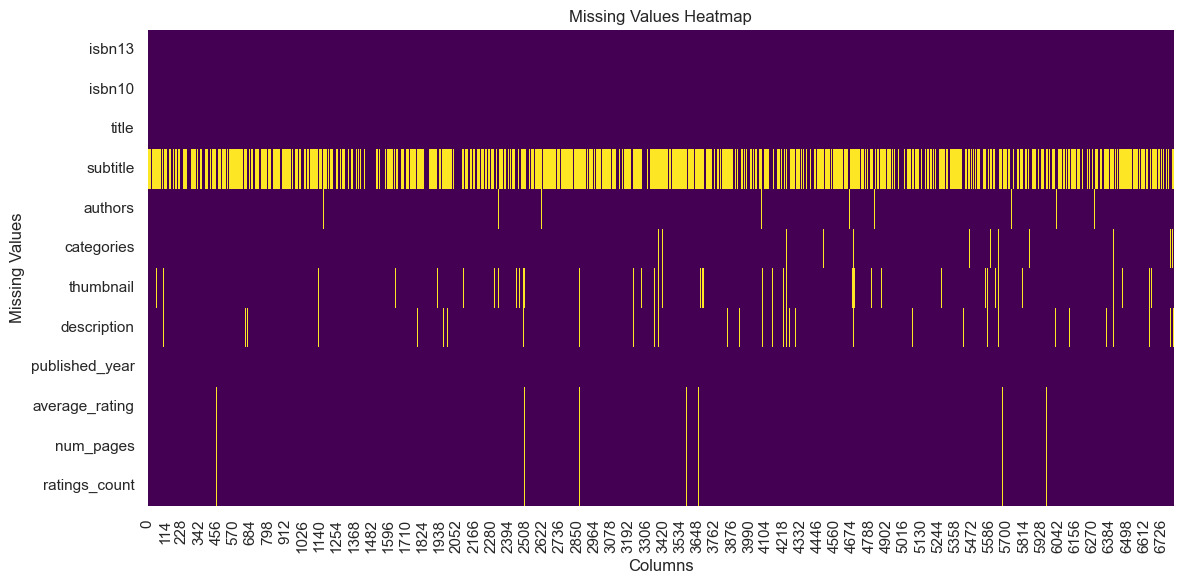

In [274]:
# Check for missing values
print("\nMissing values heatmap...")
plt.figure(figsize=(12, 6))
ax = plt.axes()
sns.heatmap(books.isna().transpose(), ax=ax, cbar=False, cmap='viridis')
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()


Creating new features...

Analyzing correlations...


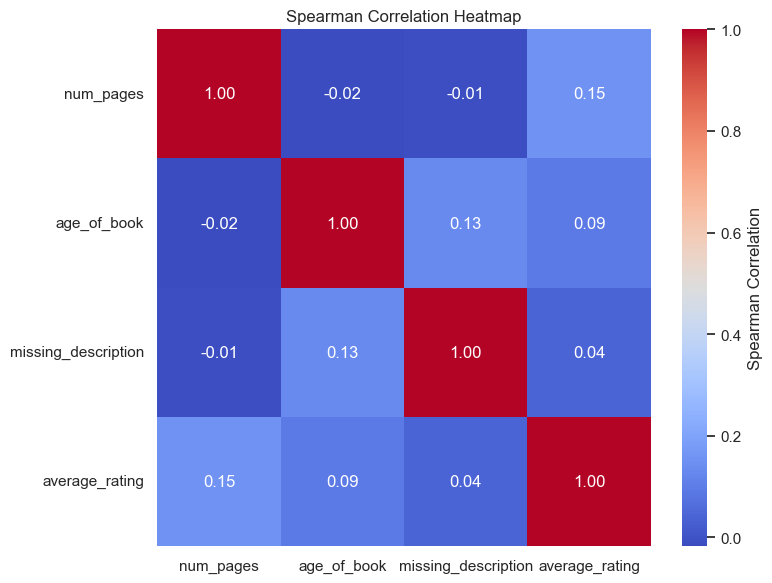

In [275]:
# Create new features
print("\nCreating new features...")
books = books.copy()  # Explicit copy to avoid warnings
books["missing_description"] = np.where(books['description'].isna(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

# Analyze correlations
print("\nAnalyzing correlations...")
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]
correlation_matrix = books[columns_of_interest].corr(method="spearman")

plt.figure(figsize=(8, 6))
sns.set_theme(style="white")
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
                      cbar_kws={"label": "Spearman Correlation"})
heatmap.set_title("Spearman Correlation Heatmap")
plt.tight_layout()
plt.show()


In [276]:
# Filter out rows with missing values in key columns
print("\nFiltering out rows with missing values...")
books_missing = books[
    (~books["description"].isna()) &
    (~books["num_pages"].isna()) &
    (~books["average_rating"].isna()) &
    (~books["published_year"].isna())
].copy()  # Explicit copy to avoid chained assignment
print(f"Filtered dataset shape: {books_missing.shape}")

# Analyze categories
print("\nTop categories:")
top_categories = books_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)
print(top_categories.head(10))


Filtering out rows with missing values...
Filtered dataset shape: (6507, 14)

Top categories:
                  categories  count
0                    Fiction   2523
1           Juvenile Fiction    534
2  Biography & Autobiography    391
3                    History    258
4         Literary Criticism    164
5                 Philosophy    154
6    Comics & Graphic Novels    152
7                   Religion    136
8                      Drama    126
9        Juvenile Nonfiction    114


In [277]:
# Calculate words in description
print("\nCalculating words in description...")
books_missing.loc[:, "words_in_description"] = books_missing["description"].str.split().str.len()

# Display description length samples
print("\nSample descriptions by word count ranges:")
print("\n1-4 words:")
sample_1_4 = books_missing.loc[books_missing["words_in_description"].between(1, 4), "description"]
if not sample_1_4.empty:
    for i, desc in enumerate(sample_1_4.head(2).values, 1):
        print(f"  {i}. {desc}")


Calculating words in description...

Sample descriptions by word count ranges:

1-4 words:
  1. Donation.
  2. Fantasy-roman.


In [278]:
print("\n5-14 words:")
sample_5_14 = books_missing.loc[books_missing["words_in_description"].between(5, 14), "description"]
if not sample_5_14.empty:
    for i, desc in enumerate(sample_5_14.head(2).values, 1):
        print(f"  {i}. {desc}")




5-14 words:
  1. Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.
  2. Koko is Peter Straub's foray into the psychological horror of the Vietnam War.


In [279]:
print("\n15-24 words:")
sample_15_24 = books_missing.loc[books_missing["words_in_description"].between(15, 24), "description"]
if not sample_15_24.empty:
    for i, desc in enumerate(sample_15_24.head(2).values, 1):
        print(f"  {i}. {desc}")




15-24 words:
  1. One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new generation of fans.
  2. Tells the story of three generations of Chinese women, beginning at the turn of the century.


In [280]:
print("\n25-34 words:")
sample_25_34 = books_missing.loc[books_missing["words_in_description"].between(25, 34), "description"]
if not sample_25_34.empty:
    for i, desc in enumerate(sample_25_34.head(2).values, 1):
        print(f"  {i}. {desc}")




25-34 words:
  1. Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetieth birthday celebrations there are ghosts of absent friends and absent enemies.
  2. Available in the U.S. for the first time, this is the second volume in the exceptional Legends of the Riftwar series from "New York Times"-bestselling authors Feist and Rosenberg.


In [281]:
# Filter for books with at least 25 words in description
print("\nFiltering for books with 25+ words in description...")
books_missing_25_words = books_missing[books_missing["words_in_description"] >= 25].copy()
print(f"Books with 25+ word descriptions: {books_missing_25_words.shape[0]}")




Filtering for books with 25+ words in description...
Books with 25+ word descriptions: 5197


In [282]:
# Create title and subtitle combination
print("\nCreating title and subtitle combination...")
books_missing_25_words.loc[:, "title_and_subtitle"] = np.where(
    books_missing_25_words["subtitle"].isna(),
    books_missing_25_words["title"],
    books_missing_25_words["title"] + ": " + books_missing_25_words["subtitle"].fillna('')
)

# Create tagged description (ISBN + description)
print("\nCreating tagged descriptions...")
books_missing_25_words.loc[:, "tagged_description"] = (
    books_missing_25_words["isbn13"].astype(str) + " " + books_missing_25_words["description"]
)



Creating title and subtitle combination...

Creating tagged descriptions...


In [283]:
# Display final cleaned data summary
print("\n" + "="*80)
print("FINAL CLEANED DATASET SUMMARY")
print("="*80)
print(f"Final dataset shape: {books_missing_25_words.shape}")
print(f"Total books: {len(books_missing_25_words)}")
print(f"Average rating: {books_missing_25_words['average_rating'].mean():.2f}")
print(f"Average pages: {books_missing_25_words['num_pages'].mean():.1f}")
print(f"Publication year range: {books_missing_25_words['published_year'].min():.0f} - {books_missing_25_words['published_year'].max():.0f}")


FINAL CLEANED DATASET SUMMARY
Final dataset shape: (5197, 17)
Total books: 5197
Average rating: 3.92
Average pages: 348.5
Publication year range: 1876 - 2019


In [284]:
print("\nColumns in final dataset:")
for i, col in enumerate(books_missing_25_words.columns.tolist(), 1):
    print(f"  {i:2d}. {col}")




Columns in final dataset:
   1. isbn13
   2. isbn10
   3. title
   4. subtitle
   5. authors
   6. categories
   7. thumbnail
   8. description
   9. published_year
  10. average_rating
  11. num_pages
  12. ratings_count
  13. missing_description
  14. age_of_book
  15. words_in_description
  16. title_and_subtitle
  17. tagged_description


In [285]:
# Save to CSV
print("\nSaving cleaned dataset to 'books_cleaned.csv'...")
final_columns_to_drop = ["subtitle", "missing_description", "age_of_book", "words_in_description"]
columns_to_keep = [col for col in books_missing_25_words.columns if col not in final_columns_to_drop]

books_missing_25_words[columns_to_keep].to_csv("books_cleaned.csv", index=False)

print("Cleaning complete! File saved as 'books_cleaned.csv'")

# Display the first few rows in a clean, readable format
print("\n" + "="*80)
print("FIRST 2 ROWS OF CLEANED DATASET (READABLE FORMAT)")
print("="*80)

saved_data = pd.read_csv("books_cleaned.csv")

# Set pandas display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)  # Limit column width for readability

print("\nFirst 2 rows:")
print(saved_data.head(2))

# Reset display options
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


Saving cleaned dataset to 'books_cleaned.csv'...
Cleaning complete! File saved as 'books_cleaned.csv'

FIRST 2 ROWS OF CLEANED DATASET (READABLE FORMAT)

First 2 rows:
          isbn13      isbn10         title                          authors  \
0  9780002005883  0002005883        Gilead               Marilynne Robinson   
1  9780002261982  0002261987  Spider's Web  Charles Osborne;Agatha Christie   

                      categories  \
0                        Fiction   
1  Detective and mystery stories   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   

   average_rating  num_pages  ratings_count     title_and_subtitle  \
0            3.85      247.0

In [286]:
# Show compact version with truncated text
print("\n" + "="*80)
print("COMPACT VIEW (text truncated for display)")
print("="*80)

compact_view = saved_data.head(2).copy()
# Truncate long text fields for display
for col in ['description', 'tagged_description']:
    compact_view[col] = compact_view[col].str[:100] + '...'

print(compact_view.to_string())

# Final verification
print("\n" + "="*80)
print("FINAL VERIFICATION")
print("="*80)
print(f"CSV columns: {saved_data.columns.tolist()}")
print(f"CSV shape: {saved_data.shape}")
print(f"CSV file saved successfully: books_cleaned.csv")

# Show data types and non-null counts
print("\nData types and counts:")
print(saved_data.info())

print("\n✅ Processing complete! The CSV file has been created with the correct format.")


COMPACT VIEW (text truncated for display)
          isbn13      isbn10         title                          authors                     categories                                                                                              thumbnail                                                                                              description  published_year  average_rating  num_pages  ratings_count     title_and_subtitle                                                                                       tagged_description
0  9780002005883  0002005883        Gilead               Marilynne Robinson                        Fiction  http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api  A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an asto...          2004.0            3.85      247.0          361.0                 Gilead  9780002005883 A NOVEL THAT READERS and critics have been ea